In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [2]:
# Get data files
!wget "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"

--2020-11-22 16:32:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘insurance.csv’

insurance.csv           [ <=>                ]  49.09K  --.-KB/s    in 0.008s  

2020-11-22 16:32:25 (5.79 MB/s) - ‘insurance.csv’ saved [50264]



In [3]:
# Importing csv data into pd dataframe
def csv_to_df():
  df = pd.read_csv("insurance.csv")
  return df

In [4]:
# Cleaning the data
def clean_data(df):
# Handling categorical data
  # Region
  df = df.join(pd.get_dummies(df.region, prefix='region')).drop('region', axis=1)

  encoding = {}
  # Sex
  values = df.sex.astype('category')
  encoding['sex'] = values.cat.categories
  df['sex'] = values.cat.codes

  # Smoker
  values = df.smoker.astype('category')
  encoding['smoker'] = values.cat.categories
  df['smoker'] = values.cat.codes
# Removing unnecessary columns
  df.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest','sex','children'], axis=1, inplace=True)
  return df

In [5]:
# Splitting the data
def split_data(df):
  size = int(len(df) * .2)
  train_dataset = df[:-size]
  test_dataset  = df[-size:]
  train_labels  = train_dataset['expenses']
  train_dataset = train_dataset.drop('expenses', axis=1)
  test_labels   = test_dataset['expenses']
  test_dataset  = test_dataset.drop('expenses', axis=1)
  return train_dataset, test_dataset, train_labels, test_labels 

In [6]:
# Building the model
def create_model(train_dataset):
  model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(len(train_dataset.keys()),)), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.Dense(1)])
  model.compile(optimizer= tf.keras.optimizers.RMSprop(0.05),loss='mse',metrics=['mae', 'mse'])
  print(model.summary())
  return model

In [7]:
# Training the model
def train_model(model):
  model.fit(train_dataset, train_labels, epochs=500,verbose=0)

In [8]:
def evaluate_model(model, test_dataset, test_labels):
  loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
  print("Loss : ",loss)
  print("Mean Absolute Error : ",mae)
  print("Mean Squared Error : ", mse)
  return loss, mae, mse

In [9]:
# Testing model by checking how well the model generalizes using the test set
def test_model(model, test_dataset, test_labels):
  loss, mae, mse = evaluate_model(model,test_dataset, test_labels)
  print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

  if mae < 3500:
    print("You passed the challenge. Great job!")
  else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plotting predictions
  test_predictions = model.predict(test_dataset).flatten()

  a = plt.axes(aspect='equal')
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True values (expenses)')
  plt.ylabel('Predictions (expenses)')
  lims = [0, 50000]
  plt.xlim(lims)
  plt.ylim(lims)
  linregplot = plt.plot(lims,lims)
  print(linregplot)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 3)                 12        
_________________________________________________________________
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,493
Trainable params: 4,487
Non-trainable params: 6
_________________________________________________________________
None
Training the model now....
Evaluating the model....
9/9 - 0s - loss: 22288916.0000 - mae: 2677.5779 - mse: 22288916.0000
Loss :  22288916.0
Mean Absolute Error :  2677.577880859375
Mean Squared Error :  22288916.0
Testing the model....
9/9 - 0s - 

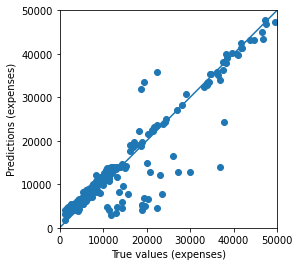

In [10]:
if __name__== '__main__':
  df = csv_to_df()
  df = clean_data(df)
  train_dataset, test_dataset, train_labels, test_labels = split_data(df)
  model = create_model(train_dataset)
  print("Training the model....")
  train_model(model)
  print("Evaluating the model....")
  evaluate_model(model, test_dataset, test_labels)
  print("Testing the model....")
  test_model(model, test_dataset, test_labels)